# Tutorial do módulo igraph

## Importando igraph

In [208]:
from igraph import *
import matplotlib.pyplot as plt

## Criando grafos

In [129]:
# Criando um grafo
G = Graph()
print(G)

IGRAPH U--- 0 0 --


In [130]:
# Adicionando vértices ao grafo
G.add_vertices(5)
print(G)

IGRAPH U--- 5 0 --


In [131]:
# Adicionando arestas ao grafo
G.add_edges([(0,1), (1,2), (1,3), (3,4)])
print(G)

IGRAPH U--- 5 4 --
+ edges:
0--1 1--2 1--3 3--4


In [132]:
# Obtendo ID de uma aresta
G.get_eid(0,1)

0

In [133]:
# Deletando uma aresta
G.delete_edges(0)
print(G)

IGRAPH U--- 5 3 --
+ edges:
1--2 1--3 3--4


In [134]:
# Deletando um vértice
G.delete_vertices(0)
print(G)

IGRAPH U--- 4 3 --
+ edges:
0--1 0--2 2--3


In [135]:
# Visualizando o grafo sem poluir a tela com as arestas
summary(G)

IGRAPH U--- 4 3 -- 


## Geradores de grafos

Existem geradores determinísticos e estocásticos

In [136]:
# Gerando uma árvore com 8 vértices onde cada vértice possui 2 filhos a não ser as folhas
G = ig.Graph.Tree(8,2)
print(G)

IGRAPH U--- 8 7 --
+ edges:
0--1 0--2 1--3 1--4 2--5 2--6 3--7


In [137]:
# Obtendo a lista de arestas do grafo
arestas = G.get_edgelist()
print(arestas)

[(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7)]


## Atributos para vértices e arestas

In [138]:
# Todo grafo possui dois elementos especiais vs e es
# es e vs são as sequencias de arestas e vértices respectivamente
# ambos podem ser usados para atribuir características aos objetos do grafo
# vamos criar um grafo que representa uma rede social
G = Graph([(0,1),(1,2),(1,3),(3,4),(2,3),(2,4)])
# Lembrando que tanto os vértices quanto as arestas possuem um id que caracteriza unicamente eles

In [139]:
# Adicionando nomes, idades e se a relação é profissional
G.vs["nome"] = ['Wesley', 'Marcelo', 'Julia', 'Courtney', 'Claire']
G.vs["idade"] = [22,23,21,20,25]
G.es["profissional"] = [True, False, True, False, True, True]

In [140]:
# Verificando atributos de vértices e arestas
print(G.vs[0].attributes())
print(G.es[0].attributes())

{'nome': 'Wesley', 'idade': 22}
{'profissional': True}


In [141]:
# Alterando uma característica
G.es[0]['profissional'] = False
G.es[0]['profissional']

False

In [142]:
# Além dos vértices e arestas os próprios grafos podem ter um dicionário associado
G["data"] = "2021-01-01"
G["ambiente"] = "Trabalho"

In [143]:
print(G)

IGRAPH U--- 5 6 --
+ attr: ambiente (g), data (g), idade (v), nome (v), profissional (e)
+ edges:
0 -- 1       1 -- 0 2 3   2 -- 1 3 4   3 -- 1 2 4   4 -- 2 3


In [144]:
# Podemos também deletar uma característica
del G["data"]
print(G)

IGRAPH U--- 5 6 --
+ attr: ambiente (g), idade (v), nome (v), profissional (e)
+ edges:
0 -- 1       1 -- 0 2 3   2 -- 1 3 4   3 -- 1 2 4   4 -- 2 3


## Características estruturais dos grafos

In [145]:
# Obtendo a lista de graus dos vértices
graus = G.degree()
print(graus)
print(G)

[1, 3, 3, 3, 2]
IGRAPH U--- 5 6 --
+ attr: ambiente (g), idade (v), nome (v), profissional (e)
+ edges:
0 -- 1       1 -- 0 2 3   2 -- 1 3 4   3 -- 1 2 4   4 -- 2 3


In [146]:
# Obtendo os graus de apenas um subconjunto de vértices
print(G.degree(1))
print(G.degree([0,1]))

3
[1, 3]


In [147]:
# Obtendo grau máximo
print(G.maxdegree())

3


## Realizando queries no nosso grafo

In [148]:
# Pegando os nomes dos vértices que apresentam grau máximo
G.vs.select(_degree = G.maxdegree())["nome"]

['Marcelo', 'Julia', 'Courtney']

In [149]:
# Pegando apenas vértices onde a idade é ímpar
nomes = [elemento['nome'] for elemento in G.vs.select(lambda vertice: vertice["idade"] % 2 == 1)]
print(nomes)

['Marcelo', 'Julia', 'Claire']


Comandos interessantes de serem usados com o select.

![Comandos](1.JPG)

**Obs.** É importante notar que não é permitido o uso de comparções diferentes de igualdade

## Objetos vértice e aresta


In [150]:
# Salvando um objeto vértice
wesley = G.vs.find(nome="Wesley")
type(wesley)

igraph.Vertex

In [151]:
# Verificando que o objeto vértice possui
wesley["idade"]

22

## Procurando um vértice por nome

In [152]:
# igraph trata de maneira especial um atributo chamado "name", esse podendo ser usado em buscas
G.vs["name"] = ["Wesley", "Marcelo", "Julia", "Courtney", "Claire"]

In [153]:
Wesley = G.degree("Wesley")
Wesley

1

## Matriz de adjacência

In [154]:
# Obtendo a matriz de adjacência do nosso grafo
G.get_adjacency()

Matrix([[0, 1, 0, 0, 0], [1, 0, 1, 1, 0], [0, 1, 0, 1, 1], [0, 1, 1, 0, 1], [0, 0, 1, 1, 0]])

## Layout e plot de grafos

In [155]:
# Verificando o estado atual do grafo
print(G)

IGRAPH UN-- 5 6 --
+ attr: ambiente (g), idade (v), name (v), nome (v), profissional (e)
+ edges (vertex names):
  Wesley -- Marcelo                     Courtney -- Marcelo, Julia, Claire
 Marcelo -- Wesley, Julia, Courtney       Claire -- Julia, Courtney
   Julia -- Marcelo, Courtney, Claire


No igraph existem os layouts, esses são padrões de organização dos vértices na área de plotagem. Seguem um resumo de alguns tipos de layouts.

![Comandos](2.JPG)

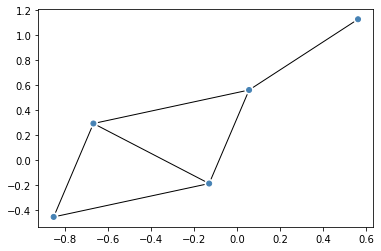

In [188]:
# Plotando o grafo de maneira simples
layout = G.layout("kk")
fig, ax = plt.subplots()
igraph.plot(G,layout=layout, target=ax)

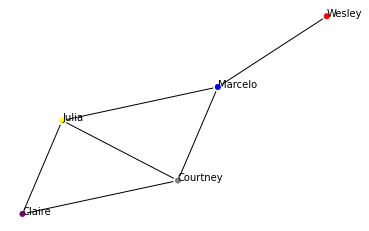

In [189]:
# Dando uma incrementada no visual do grafo
G.vs["label"] = G.vs["name"]
color_dict = {'Wesley' : "red", 'Marcelo' : "blue", 'Julia' : "yellow", 'Courtney' : "gray", 'Claire' : 'purple'}
G.vs["color"] = [color_dict[nome] for nome in G.vs["nome"]]
fig, ax = plt.subplots()
plt.axis('off')
plot(G,layout=layout, bbox=(300, 300), target=ax, vertex_color = G.vs["color"], vertex_label = G.vs["label"])

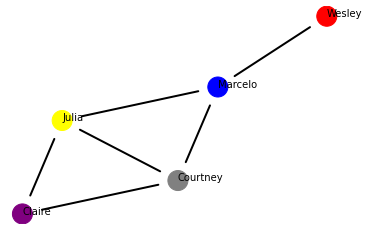

In [207]:
# Dando uma incrementada ainda maior no visual do grafo
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_color"] = G.vs["color"]
visual_style["vertex_label"] = G.vs["label"]
visual_style["edge_width"] = 2
visual_style["layout"] = layout
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 20
fig, ax = plt.subplots()
plt.axis('off')
plot(G, target=ax, **visual_style)

Possíveis parâmetros a serem configurados quando queremos modificar configurações da visualização:

![Comandos](3.JPG)

![Comandos](4.JPG)